# HR System in an Organization

  Implementing the HR System in an organization comprising of two departments "IT" and "HR". The implementation is based on the trees using classes and objects with the concept of "Inheritance". For this purpose, created six classes namely:
Department, which is containing information about Departments and can be extended and currently I am considering two departments of "HR" And "IT".
StaffMembers, which contains information about employee details like employee number, name, zipcode, birthday, hiring date, this cla
++++ss is implemented with inheritence concept collecting data from Department into StaffMembers class.
Developers, which contains information about employees who are sub ordinates under managers in particular department.
Managers, which contains the information about the manager under whom sub ordinates are present.
Administrator, which contains the information about the employees as sub ordinates under him that includes employees and managers for particular departments.
All these classes are implemented with "Inheritance", Developers, Managers and Administrator classes have multi level inheritence.

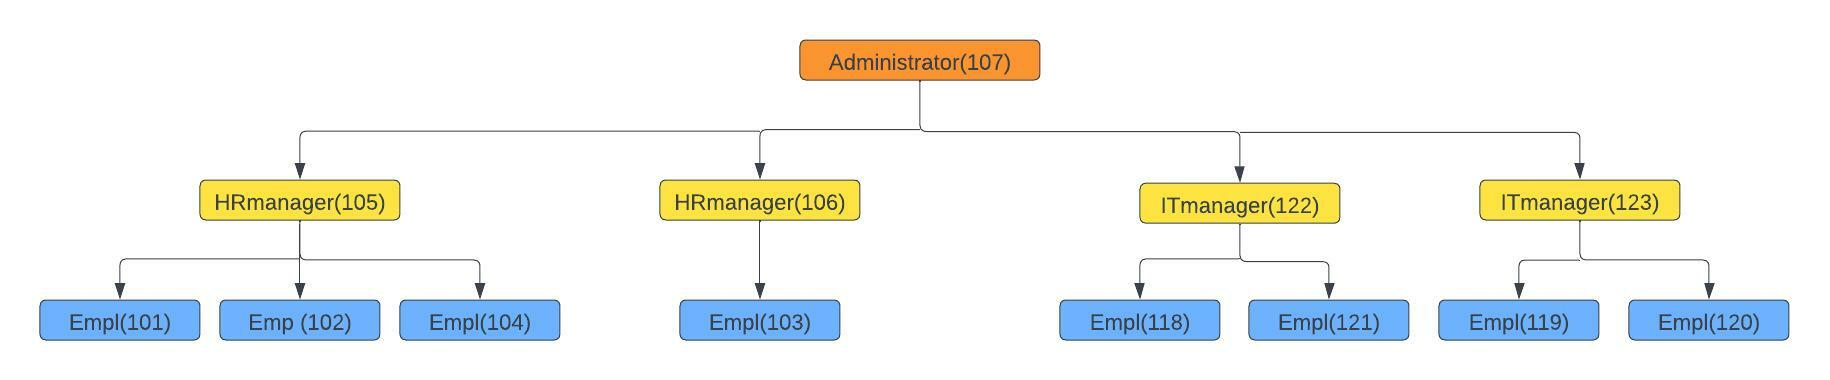

The above tree is created and stored as list of dictionaries with employees hierarchy data as shown above

In [1]:
import datetime
from operator import itemgetter
from datetime import datetime

#Table is initialized to store data of each employee as each dictionary
hr_table = []

class Department(object):
    def __init__(self, dept):
        self.dept = dept
        
        
class StaffMembers(Department):
    #attributes initialization(class variable)
    emp = 0
    def __init__(self, empno, name, birthday, zipcode, hiringdate,dept):
        """Staff member name and lists for each entry is created"""
        super().__init__(dept)
        self.empno = empno
        self.name = name
        self.birthday = birthday
        self.zipcode = zipcode
        self.hiringdate = hiringdate
        self.dept = dept
        StaffMembers.emp = StaffMembers.emp + 1
    

    def get_name(self):
        """returns name of a staff"""
        return self.name
    
    def get_birthday(self):
        """returns birthday of a member"""
        return self.birthday            

    def get_zipcode(self):
        """returns zip code"""
        return self.zipcode

    def get_hiringdate(self):
        """returns hiring date"""
        return self.hiringdate 
    
    def search_keys(self, List, Key, Value):
        """searches keys with values in a list of dictionaries"""
        for i in List:
            if i.get(Key) == Value:
                return i
        return None
    
    
    
#Developer class is implemented with objects from StaffMembers class to store the data of employees under sub ordinates       
class Developer(StaffMembers):
    dev = 0
    def __init__(self, empno, name, birthday, zipcode, hiringdate,dept,design):
        StaffMembers.__init__(self, empno, name, birthday, zipcode, hiringdate,dept)  
        self.design = design
        Developer.dev = Developer.dev + 1
        if(self.search_keys(hr_table, 'empno', self.empno) == None):
            hr_table.append({'empno':self.empno, 'name':self.name, 'dob' : self.birthday, 'zipcode' : self.zipcode, 'hiringdate':self.hiringdate, 'role':design })

#Manager class is implemented with objects from StaffMembers class to store the data of manager under administrator with sub ordinates
class Manager(StaffMembers):
    mngr = 0
    def __init__(self, empno, name, birthday, zipcode, hiringdate,dept,manager = None):
        StaffMembers.__init__(self, empno, name, birthday, zipcode, hiringdate,dept)
        self.manager = manager        
        Manager.mngr = Manager.mngr + 1
        if(self.search_keys(hr_table, 'empno', self.empno) == None):
            hr_table.append({'empno':self.empno, 'name':self.name, 'dob' : self.birthday, 'zipcode' : self.zipcode, 'hiringdate':self.hiringdate, 'role':"Manager"})
 # Administrator class is implemented with objects from StaffMembers class to store the data of manager under whom sub ordinates of managers and employees are present       
class Administrator(StaffMembers):
    admin = 0
    def __init__(self, empno, name, birthday, zipcode, hiringdate,dept,manager = None):
        StaffMembers.__init__(self, empno, name, birthday, zipcode, hiringdate,dept)  
        self.manager = manager
        Administrator.admin = Administrator.admin + 1
        if(self.search_keys(hr_table, 'empno', self.empno) == None):
            hr_table.append({'empno':self.empno, 'name':self.name, 'dob' : self.birthday, 'zipcode' : self.zipcode, 'hiringdate':self.hiringdate, 'role':"Administrator"})

            

### Time and Space Complexity:

In a tree, there are employees, managers and developers.
As it is implemented with classes and objects, the time and space complexity for the methods
get_name, get_birthday, get_zipcode, get_hiringdate, best case and worst case asymptotic complexity is O(1)

For method "search_keys", the worst case complexity is O(len(hr_table))
the best case is O(len(hr_table))

For Manager, Developer and Administrator classes, there's only one "if" condition. So, asymptotic complexity is O(1)( as best case and the worst case depends on the time complexity of method "search_keys" which is O(len(hr_table)xn)), which in worst case is O(len(hr_table)xn) and average case is O(len(hr_table)) and best case is O(1)


In [2]:
class SystemDirectory(StaffMembers):       
    
    def __init__(self):
        print("Modifying system directory")
        
    def create_table(db_table): 
        """Printing data in the form of a table"""
        print("-----------------------------------------------------------------------------------")
        print("{:<10} {:<20} {:<15} {:<10} {:<15} {:<10}".format("EMPLOYEENO", "NAME" , "BIRTHDAY", "ZIPCODE", "HIRINGDATE", "ROLE"))
        print("-----------------------------------------------------------------------------------")
        for dicts in db_table:
            enum = dicts.get('empno')
            ename = dicts.get('name')
            edate = dicts.get('dob')
            ezip = dicts.get('zipcode')
            ehire = dicts.get('hiringdate')  
            erole = dicts.get('role')
            print("{:<10} {:<20} {:<15} {:<10} {:<15} {:<20}".format(enum, ename, edate, ezip, ehire, erole))
        print("-----------------------------------------------------------------------------------")
        
        
    def List_sort(key): 
        """Sorting the data in a table as per hiring date"""
        if(key == 'hiringdate' or key == 'dob'):
            hr_table.sort(key = lambda x: datetime.strptime(x[key], '%Y-%m-%d'))
        else:
            return
        return hr_table
    
    #This method can be used to search with birthday
    def search_birthday(birthday = None):
        """Searching the table with birthday"""
        birthdaylist = []
        if(birthday == None):
            return
        else:
            birthdaylist = list(filter(lambda item: item['dob'] == birthday, hr_table))          
        return birthdaylist
    
    #This method can be used to search with zipcode
    def search_zipcode(zipcode = None):
        """Searching the table with zipcode"""
        zipcodelist = []
        if(zipcode == None):
            return
        else:
            zipcodelist = list(filter(lambda item: item['zipcode'] == zipcode, hr_table))       
        return zipcodelist
     
    #This method can be used to rempove staff member
    def Remove_Staff(empnum):
        """Removing one of the staff member"""
        for i in range(len(hr_table)):
            if hr_table[i]['empno'] == empnum:
                del hr_table[i]
                break
        return hr_table
    
    
             
            
      

### Time and Space Complexity:

For "create_table" method, best and worst time complexity is O(len(hr_table))
For "search_birthday" and "search_zipcode", best and worst time complexity is O(len(birthdaylist)) and O(len(zipcodelist))
For "Remove_Staff", worst and best time complexity is O(len(hr_table)).

### Calling class with list of class objects

Adding Employees, Managers, Administrator under which assigning sub ordinates

In [3]:
dept = Department(["HR","IT"])

eh1 = Developer(101,"James Smith", '1995-03-04', '21227', '2014-05-13',dept.dept[0],'HR Employee')
eh2 = Developer(102,"John Williams", '1992-03-05', '21228', '2012-03-19',dept.dept[0],'HR Employee')
eh3 = Developer(103,"Robert Patricia", '1990-05-04', '21228', '2013-11-02',dept.dept[0],'HR Employee')
eh4 = Developer(104,"Mary Smith", '1990-05-04', '21228', '2013-07-08',dept.dept[0],'HR Employee')

mh1 = Manager(105,"James Johnson", '1985-03-04', '21227', '2009-10-17',dept.dept[0],[eh1,eh2,eh4])
mh2 = Manager(106,"Robert Martinez", '1988-03-05', '21205', '2008-05-21',dept.dept[0],[eh3])

ei1 = Developer(118,"Johnson Steve", '1996-10-17', '21250', '2017-09-05',dept.dept[0],'IT Employee')
ei2 = Developer(119,"Nathan Harvey", '1991-03-09', '21250', '2019-07-08',dept.dept[0],'IT Employee')
ei3 = Developer(120,"Aaron Patricia", '1994-06-14', '21228', '2021-10-12',dept.dept[0],'IT Employee')
ei4 = Developer(121,"Lisa Messey", '1993-08-05', '21228', '2022-05-17',dept.dept[0],'IT Employee')

mi1 = Manager(122,"Maria Martinez", '1987-07-14', '21250', '2006-11-30',dept.dept[0],[ei1,ei4])
mi2 = Manager(123,"David Donald", '1985-11-23', '21228', '2007-12-04',dept.dept[0],[ei2,ei3])

admin = Administrator(107,"Nicholas Hernandez", '1995-03-04', '21227', '2000-05-13',dept.dept[0],[mh1,mh2,mi1,mi2])

### Employees under Managers and Administrator

In [4]:
#employees under manager1 of "HR"
print(f'Employees under Manager {mh1.name} :')
for emp,i in enumerate(mh1.manager, 1):
    print(emp,i.name)

Employees under Manager James Johnson :
1 James Smith
2 John Williams
3 Mary Smith


In [5]:
#employees under manager1 of "IT"
print(f'Employees under Manager {mi1.name} :')
for emp,i in enumerate(mi1.manager, 1):
    print(emp,i.name)

Employees under Manager Maria Martinez :
1 Johnson Steve
2 Lisa Messey


In [6]:
#employees under manager2 of "HR"
print(f'Employees under Manager {mh2.name} :')
for emp,i in enumerate(mh2.manager, 1):
    print(emp,i.name)

Employees under Manager Robert Martinez :
1 Robert Patricia


In [7]:
#employees under manager2 of "IT"
print(f'Employees under Manager {mi2.name} :')
for emp,i in enumerate(mi2.manager, 1):
    print(emp,i.name)

Employees under Manager David Donald :
1 Nathan Harvey
2 Aaron Patricia


In [8]:
#employees under Administrator:
print(f'Employees under Administrator {admin.name} :')
for emp,i in enumerate(admin.manager, 1):
    print(emp,i.name)

Employees under Administrator Nicholas Hernandez :
1 James Johnson
2 Robert Martinez
3 Maria Martinez
4 David Donald


### Creation of HR Table in an organization

In [9]:
SystemDirectory.create_table(hr_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
101        James Smith          1995-03-04      21227      2014-05-13      HR Employee         
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
105        James Johnson        1985-03-04      21227      2009-10-17      Manager             
106        Robert Martinez      1988-03-05      21205      2008-05-21      Manager             
118        Johnson Steve        1996-10-17      21250      2017-09-05      IT Employee         
119        Nathan Harvey        1991-03-09      21250      2019-07-08     

### Sorting the HR table with "hiring date" in an organization

In [10]:
sorted_table = SystemDirectory.List_sort('hiringdate')
SystemDirectory.create_table(sorted_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
122        Maria Martinez       1987-07-14      21250      2006-11-30      Manager             
123        David Donald         1985-11-23      21228      2007-12-04      Manager             
106        Robert Martinez      1988-03-05      21205      2008-05-21      Manager             
105        James Johnson        1985-03-04      21227      2009-10-17      Manager             
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02     

### Searching the table with "birthday" 

In [11]:
listbday = SystemDirectory.search_birthday('1992-03-05')
SystemDirectory.create_table(listbday)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
-----------------------------------------------------------------------------------


### Searching the table with "ZipCode"

In [12]:
ziplist = SystemDirectory.search_zipcode('21227')
SystemDirectory.create_table(ziplist)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
105        James Johnson        1985-03-04      21227      2009-10-17      Manager             
101        James Smith          1995-03-04      21227      2014-05-13      HR Employee         
-----------------------------------------------------------------------------------


### Removing the "employee" in the table

In [13]:
modified_table = SystemDirectory.Remove_Staff(105)
SystemDirectory.create_table(modified_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
122        Maria Martinez       1987-07-14      21250      2006-11-30      Manager             
123        David Donald         1985-11-23      21228      2007-12-04      Manager             
106        Robert Martinez      1988-03-05      21205      2008-05-21      Manager             
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02      HR Employee         
101        James Smith          1995-03-04      21227      2014-05-13     

### Modifying particular employee details 

In [14]:
def modify_Staff(empnum, key=None, value=None, data_dict=None):
        for i in range(len(hr_table)):
            if hr_table[i]['empno'] == empnum:
                hr_table[i][key] = value                
                break
            elif(data_dict!=None and (hr_table[i]['empno'] != empnum)):
                hr_table.append(data_dict)                
                break
            

For this method, the time complexity is O(len(hr_table)) as only one "for loop" is used.

Updating Particular employee data

In [15]:
modify_Staff(106,'hiringdate','2008-07-23')
SystemDirectory.create_table(hr_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
122        Maria Martinez       1987-07-14      21250      2006-11-30      Manager             
123        David Donald         1985-11-23      21228      2007-12-04      Manager             
106        Robert Martinez      1988-03-05      21205      2008-07-23      Manager             
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02      HR Employee         
101        James Smith          1995-03-04      21227      2014-05-13     

### Adding Employee to the HR Table

Adding employee with details to the table

In [16]:
dict_value = {'empno': 155,'name': 'Sarah Messey','dob': '1994-03-07','zipcode': '21250','hiringdate': '2014-08-19','role': 'Employee'}
modify_Staff(155,data_dict=dict_value)
SystemDirectory.create_table(hr_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
122        Maria Martinez       1987-07-14      21250      2006-11-30      Manager             
123        David Donald         1985-11-23      21228      2007-12-04      Manager             
106        Robert Martinez      1988-03-05      21205      2008-07-23      Manager             
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02      HR Employee         
101        James Smith          1995-03-04      21227      2014-05-13     

### Sorting table 

sorting the table as per "hiring date"

In [17]:
sorted_table = SystemDirectory.List_sort('hiringdate')
SystemDirectory.create_table(sorted_table)

-----------------------------------------------------------------------------------
EMPLOYEENO NAME                 BIRTHDAY        ZIPCODE    HIRINGDATE      ROLE      
-----------------------------------------------------------------------------------
107        Nicholas Hernandez   1995-03-04      21227      2000-05-13      Administrator       
122        Maria Martinez       1987-07-14      21250      2006-11-30      Manager             
123        David Donald         1985-11-23      21228      2007-12-04      Manager             
106        Robert Martinez      1988-03-05      21205      2008-07-23      Manager             
102        John Williams        1992-03-05      21228      2012-03-19      HR Employee         
104        Mary Smith           1990-05-04      21228      2013-07-08      HR Employee         
103        Robert Patricia      1990-05-04      21228      2013-11-02      HR Employee         
101        James Smith          1995-03-04      21227      2014-05-13     

### Unit Test Cases:

   Tested all the functions or methods in all the classes 

In [18]:
import unittest
 
#Testing class "StaffMembers"
class TestStaff(unittest.TestCase):
    # test function
     def test_StaffMembers(self):
        e1 = StaffMembers(101,'James Smith', '1995-03-04', '21227', '2014-05-21','IT')         
        self.assertEqual(e1.name, 'James Smith')
        self.assertEqual(e1.birthday, '1995-03-04')
        self.assertEqual(e1.zipcode, '21227')
        self.assertEqual(e1.hiringdate, '2014-05-21')
        self.assertEqual(e1.dept, 'IT')
        self.assertEqual(e1.get_name(),'James Smith')
        self.assertEqual(e1.get_birthday(),'1995-03-04')
        self.assertEqual(e1.get_zipcode(),'21227')
        self.assertEqual(e1.get_hiringdate(),'2014-05-21')
        arrlist = [{'empno': 101,'name': 'James Smith','dob': '1995-03-04','zipcode': '21227','hiringdate': '2014-05-21','role': 'Employee'},
           {'empno': 102,'name': 'Sam Smith','dob': '1994-03-04','zipcode': '21228','hiringdate': '2013-05-21','role': 'Employee'}]
        self.assertEqual(e1.search_keys(arrlist, 'empno', 101),arrlist[0])

#Testing class "Department"
class TestDepartment(unittest.TestCase):
    # test function
     def test_department(self):
        d1 = Department('HR')
        self.assertEqual(d1.dept, 'HR')    

#Testing class "Developer"
class TestDeveloper(unittest.TestCase):
    # test function
     def test_developer(self):
        dev1 = Developer(101,"James Smith", '1995-03-04', '21227', '2014-05-21',dept.dept[0],'programmer')
        self.assertEqual(dev1.name, 'James Smith')
        self.assertEqual(dev1.birthday, '1995-03-04')
        self.assertEqual(dev1.zipcode, '21227')
        self.assertEqual(dev1.hiringdate, '2014-05-21')
        self.assertEqual(dev1.dept, 'HR')
        self.assertEqual(dev1.empno, 101)

#Testing class "Manager"
class TestManager(unittest.TestCase):
    # test function
     def test_manager(self):
        mh1 = Manager(105,"James Johnson", '1985-03-04', '21227', '2009-05-21',dept.dept[0],[eh1,eh2])
        self.assertEqual(mh1.name, 'James Johnson')
        self.assertEqual(mh1.birthday, '1985-03-04')
        self.assertEqual(mh1.zipcode, '21227')
        self.assertEqual(mh1.hiringdate, '2009-05-21')
        self.assertEqual(mh1.dept, 'HR')
        self.assertEqual(mh1.empno, 105)

#Testing class "Administartor"
class TestAdministrator(unittest.TestCase):
    # test function
     def test_administrator(self):
        admin = Administrator(107,"Nicholas Hernandez", '1995-03-04', '21227', '2000-05-13',dept.dept[0],[mh1,mh2])
        self.assertEqual(admin.empno, 107)
        self.assertEqual(admin.name, 'Nicholas Hernandez')
        self.assertEqual(admin.birthday, '1995-03-04')
        self.assertEqual(admin.zipcode, '21227')
        self.assertEqual(admin.hiringdate, '2000-05-13')
        self.assertEqual(admin.dept, 'HR')
        self.assertEqual(admin.empno, 107)
        
#Testing function "search_birthday" in class "SystemDirectory"
class TestSystemDirectoryBirthday(unittest.TestCase):
     def test_searchbirthday(self):
        self.assertEqual(None, None)        
        test_birthday = [{'empno': 102,
                          'name': 'John Williams',
                          'dob': '1992-03-05',
                          'zipcode': '21228',
                          'hiringdate': '2012-03-19',
                          'role': 'HR Employee'}]
        actualzip = SystemDirectory.search_birthday('1992-03-05')
        expectedzip = test_birthday
        self.assertEqual(actualzip, expectedzip)
        
#Testing function "Listsort()" in class "SystemDirectory"        
class TestSystemDirectoryListsort(unittest.TestCase):
     def test_listsort(self):
        actual = SystemDirectory.List_sort('hiringdate')        
        expected = [{'empno': 107, 'name': 'Nicholas Hernandez', 'dob': '1995-03-04', 'zipcode': '21227', 'hiringdate': '2000-05-13', 'role': 'Administrator'}, {'empno': 122, 'name': 'Maria Martinez', 'dob': '1987-07-14', 'zipcode': '21250', 'hiringdate': '2006-11-30', 'role': 'Manager'}, {'empno': 123, 'name': 'David Donald', 'dob': '1985-11-23', 'zipcode': '21228', 'hiringdate': '2007-12-04', 'role': 'Manager'}, {'empno': 106, 'name': 'Robert Martinez', 'dob': '1988-03-05', 'zipcode': '21205', 'hiringdate': '2008-07-23', 'role': 'Manager'}, {'empno': 105, 'name': 'James Johnson', 'dob': '1985-03-04', 'zipcode': '21227', 'hiringdate': '2009-05-21', 'role': 'Manager'}, {'empno': 102, 'name': 'John Williams', 'dob': '1992-03-05', 'zipcode': '21228', 'hiringdate': '2012-03-19', 'role': 'HR Employee'}, {'empno': 104, 'name': 'Mary Smith', 'dob': '1990-05-04', 'zipcode': '21228', 'hiringdate': '2013-07-08', 'role': 'HR Employee'}, {'empno': 103, 'name': 'Robert Patricia', 'dob': '1990-05-04', 'zipcode': '21228', 'hiringdate': '2013-11-02', 'role': 'HR Employee'}, {'empno': 101, 'name': 'James Smith', 'dob': '1995-03-04', 'zipcode': '21227', 'hiringdate': '2014-05-13', 'role': 'HR Employee'}, {'empno': 155, 'name': 'Sarah Messey', 'dob': '1994-03-07', 'zipcode': '21250', 'hiringdate': '2014-08-19', 'role': 'Employee'}, {'empno': 118, 'name': 'Johnson Steve', 'dob': '1996-10-17', 'zipcode': '21250', 'hiringdate': '2017-09-05', 'role': 'IT Employee'}, {'empno': 119, 'name': 'Nathan Harvey', 'dob': '1991-03-09', 'zipcode': '21250', 'hiringdate': '2019-07-08', 'role': 'IT Employee'}, {'empno': 120, 'name': 'Aaron Patricia', 'dob': '1994-06-14', 'zipcode': '21228', 'hiringdate': '2021-10-12', 'role': 'IT Employee'}, {'empno': 121, 'name': 'Lisa Messey', 'dob': '1993-08-05', 'zipcode': '21228', 'hiringdate': '2022-05-17', 'role': 'IT Employee'}]
        self.assertEqual(actual, expected)
        

#Testing function "Remove_staff" in class "SystemDirectory"
class TestSystemDirectoryRemoveStaff(unittest.TestCase):
     def test_Removestaff(self):   
        
        actual = SystemDirectory.Remove_Staff(121)  
        expected = [{'empno': 107,
                     'name': 'Nicholas Hernandez',
                     'dob': '1995-03-04',
                     'zipcode': '21227',
                     'hiringdate': '2000-05-13',
                     'role': 'Administrator'},
                    {'empno': 122,
                     'name': 'Maria Martinez',
                     'dob': '1987-07-14',
                     'zipcode': '21250',
                     'hiringdate': '2006-11-30',
                     'role': 'Manager'},
                    {'empno': 123,
                     'name': 'David Donald',
                     'dob': '1985-11-23',
                     'zipcode': '21228',
                     'hiringdate': '2007-12-04',
                     'role': 'Manager'},
                    {'empno': 106,
                     'name': 'Robert Martinez',
                     'dob': '1988-03-05',
                     'zipcode': '21205',
                     'hiringdate': '2008-07-23',
                     'role': 'Manager'},
                    {'empno': 105,
                     'name': 'James Johnson',
                     'dob': '1985-03-04',
                     'zipcode': '21227',
                     'hiringdate': '2009-05-21',
                     'role': 'Manager'},
                    {'empno': 102,
                     'name': 'John Williams',
                     'dob': '1992-03-05',
                     'zipcode': '21228',
                     'hiringdate': '2012-03-19',
                     'role': 'HR Employee'},
                    {'empno': 104,
                     'name': 'Mary Smith',
                     'dob': '1990-05-04',
                     'zipcode': '21228',
                     'hiringdate': '2013-07-08',
                     'role': 'HR Employee'},
                    {'empno': 103,
                     'name': 'Robert Patricia',
                     'dob': '1990-05-04',
                     'zipcode': '21228',
                     'hiringdate': '2013-11-02',
                     'role': 'HR Employee'},
                    {'empno': 101,
                     'name': 'James Smith',
                     'dob': '1995-03-04',
                     'zipcode': '21227',
                     'hiringdate': '2014-05-13',
                     'role': 'HR Employee'},
                    {'empno': 155,
                     'name': 'Sarah Messey',
                     'dob': '1994-03-07',
                     'zipcode': '21250',
                     'hiringdate': '2014-08-19',
                     'role': 'Employee'},
                    {'empno': 118,
                     'name': 'Johnson Steve',
                     'dob': '1996-10-17',
                     'zipcode': '21250',
                     'hiringdate': '2017-09-05',
                     'role': 'IT Employee'},
                    {'empno': 119,
                     'name': 'Nathan Harvey',
                     'dob': '1991-03-09',
                     'zipcode': '21250',
                     'hiringdate': '2019-07-08',
                     'role': 'IT Employee'},
                    {'empno': 120,
                     'name': 'Aaron Patricia',
                     'dob': '1994-06-14',
                     'zipcode': '21228',
                     'hiringdate': '2021-10-12',
                     'role': 'IT Employee'}] 
        
        self.assertEqual(actual, expected)

#Testing function "search_zipcode" in class "SystemDirectory"
class TestSystemDirectoryZipcode(unittest.TestCase):
     def test_searchzipcode(self):
        self.assertEqual(None, None)        
        test_zipcode = [{'empno': 107,
                         'name': 'Nicholas Hernandez',
                         'dob': '1995-03-04',
                         'zipcode': '21227',
                         'hiringdate': '2000-05-13',
                         'role': 'Administrator'},
                        {'empno': 105, 
                         'name': 'James Johnson', 
                         'dob': '1985-03-04', 
                         'zipcode': '21227', 
                         'hiringdate': '2009-05-21', 
                         'role': 'Manager'},
                        {'empno': 101,
                         'name': 'James Smith',
                         'dob': '1995-03-04',
                         'zipcode': '21227',
                         'hiringdate': '2014-05-13',
                         'role': 'HR Employee'}]
        actual = SystemDirectory.search_zipcode('21227')  
        expected = test_zipcode        
        self.assertEqual(actual, expected)
        

        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.007s

OK


9 Test cases are written and passed. Test cases are written for the methods which are returning list or values.

## Conclusion:
   Employee HR Organization table is created with provision of adding, removing, making changes, providing subordinates under managers using Employee hierarchy in which Administrator is the main head followed by managers and Employees in various departments. Even the data in the table can be modified and new employee can be added with the methods, classes and objects implemented. Care is taken to reduce the space complexity and time complexity by using concept of list of dictionaries and limited to maximum of one for loop.
   
   Overall, in this project, I used list, dictionary, lambda function, filter, append inbuilt methods, imported datetime library, classes and objects, method callings, time complexities, sorting techniques, testing code with unit test cases that were learnt in the class.

# References:

https://www.geeksforgeeks.org/python-sort-given-list-of-dictionaries-by-date/

https://stackoverflow.com/questions/26447309/search-a-list-of-dictionary-in-python

https://www.youtube.com/watch?v=4r_XR9fUPhQ

https://www.youtube.com/watch?v=GYMRJh_RPR0

https://medium.com/@vladbezden/using-python-unittest-in-ipython-or-jupyter-732448724e31

https://www.geeksforgeeks.org/python-removing-dictionary-from-list-of-dictionaries/

https://stackoverflow.com/questions/40820059/append-multiple-dictionaries-into-one-dictionary-sequentially-in-python

https://stackoverflow.com/questions/43060655/update-values-of-a-list-of-dictionaries-in-python

https://docs.python.org/3/library/unittest.html